In [1]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


/Users/eleanor/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [3]:
ddir = '/Users/eleanor/Downloads/universe_2/'
flash = pd.read_csv(ddir+'Flash_Data.csv') 

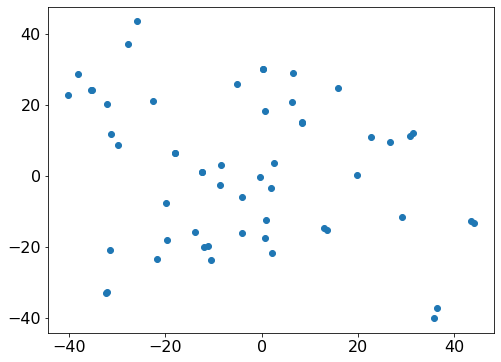

In [4]:
C=np.array(list(zip(flash.X,flash.Y)))
plt.scatter(C[:,0], C[:,1])

Text(0.5, 1.0, 'Flash-Front')

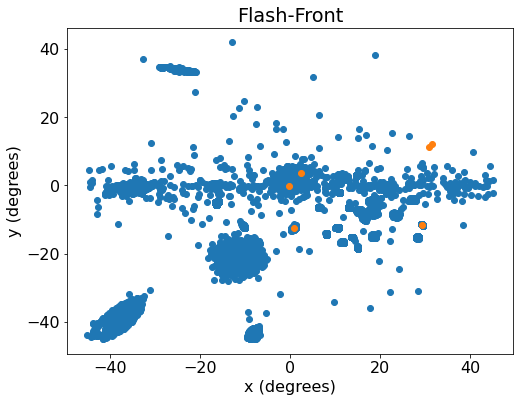

In [5]:
#Front
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

flashF=flash[flash['Direction']=='Front']
CFf=np.array(list(zip(flashF.X,flashF.Y)))
plt.scatter(CFf[:,0], CFf[:,1])
plt.title('Flash-Front')

Text(0.5, 1.0, 'Front Including Distant Star Data')

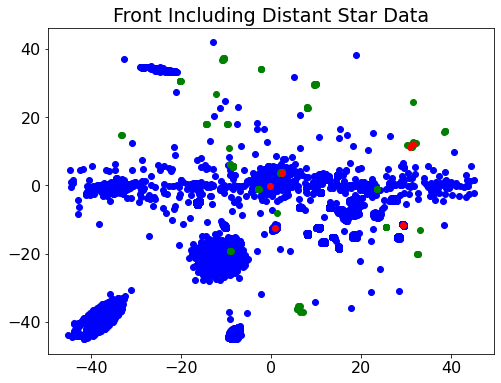

In [6]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantF = pd.read_csv(ddir+'Front/Distant_Galaxy_Data.csv') 



plt.scatter(CF[:,0], CF[:,1], color ='b')
plt.scatter(distantF.X, distantF.Y, color = 'g')
plt.scatter(CFf[:,0], CFf[:,1], color='r')
plt.title('Front Including Distant Star Data')

In [7]:
CFf
##(29.25, -11.53) -> [ 29.31678674, -11.56881882]-> matches
#(0.83, -12.43)-> [ 0.80429641, -12.51456459]
#[ -0.3 ,  -0.34]&  [  2.48,   3.71]-> [ 0.06017968,   2.00958835]

array([[ 30.9 ,  11.22],
       [  0.83, -12.43],
       [ 29.25, -11.53],
       [  2.48,   3.71],
       [ -0.3 ,  -0.34],
       [ 31.4 ,  11.97]])

Text(0.5, 1.0, 'Flash+Galaxies -Back')

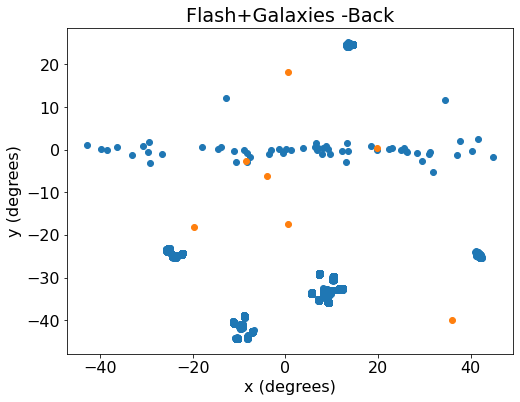

In [8]:
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

flashBA=flash[flash['Direction']=='Back']
CBAf=np.array(list(zip(flashBA.X,flashBA.Y)))
plt.scatter(CBAf[:,0], CBAf[:,1])
plt.title('Flash+Galaxies -Back')

Text(0.5, 1.0, 'Back Including Distant Star Data')

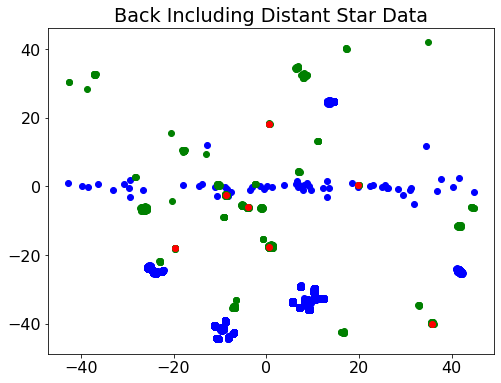

In [9]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantBA = pd.read_csv(ddir+'Back/Distant_Galaxy_Data.csv') 



plt.scatter(CBA[:,0], CBA[:,1], color ='b')
plt.scatter(distantBA.X, distantBA.Y, color = 'g')
plt.scatter(CBAf[:,0], CBAf[:,1], color='r')
plt.title('Back Including Distant Star Data')

In [10]:
CBAf ##Took out all centre ones so dont have this
#(19.81,   0.35) -> 

array([[ 35.87, -40.01],
       [ -8.57,  -2.64],
       [  0.68,  18.32],
       [ -4.  ,  -6.08],
       [ 19.81,   0.35],
       [  0.64, -17.55],
       [-19.68, -18.05]])

Text(0.5, 1.0, 'Flash+Galaxies -Right')

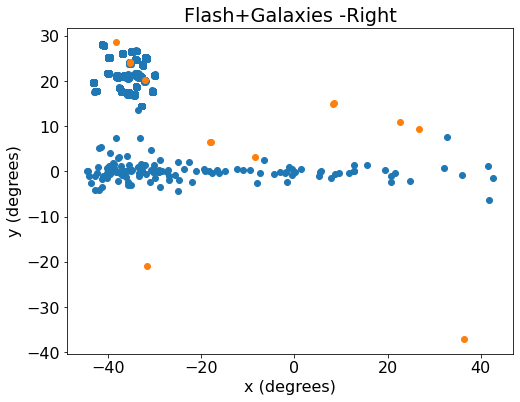

In [11]:
#Right
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

flashR=flash[flash['Direction']=='Right']
#flashF
CRf=np.array(list(zip(flashR.X,flashR.Y)))
plt.scatter(CRf[:,0], CRf[:,1])
plt.title('Flash+Galaxies -Right')

Text(0.5, 1.0, 'Right Including Distant Star Data')

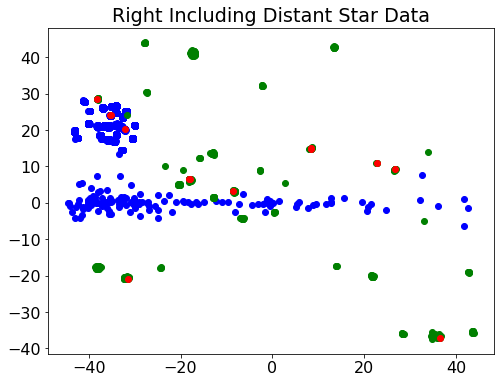

In [12]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantR = pd.read_csv(ddir+'Right/Distant_Galaxy_Data.csv') 



plt.scatter(CR[:,0], CR[:,1], color ='b')
plt.scatter(distantR.X, distantR.Y, color = 'g')
plt.scatter(CRf[:,0], CRf[:,1], color='r')
plt.title('Right Including Distant Star Data')

In [13]:
CRf
# (-35.37,  24.12) (-35.24,  24.01) -> in galaxy w/ centre (-35.28781879,  23.9697159) or (-34.0109822 ,  24.69742285)
#note i think its the first galaxy?
# (-32.15,  20.24) -> (-32.16457647,  24.54065275)

array([[  8.35,  14.86],
       [  8.42,  15.1 ],
       [-35.37,  24.12],
       [-38.22,  28.53],
       [ 26.69,   9.4 ],
       [-31.55, -20.94],
       [-35.24,  24.01],
       [-32.15,  20.24],
       [ 22.7 ,  10.93],
       [ -8.53,   3.14],
       [-17.97,   6.44],
       [ 36.42, -37.08],
       [-18.09,   6.5 ]])

Text(0.5, 1.0, 'Flash+Galaxies -Left')

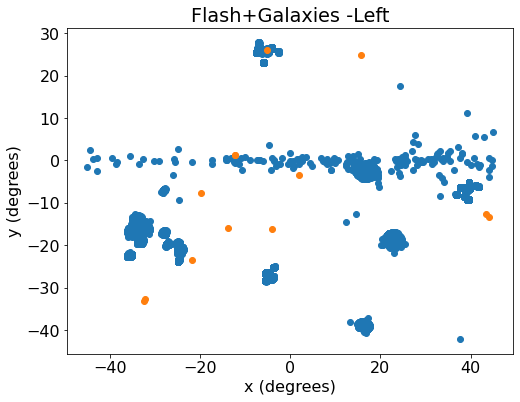

In [14]:
#Left
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

flashL=flash[flash['Direction']=='Left']
#flashF
CLf=np.array(list(zip(flashL.X,flashL.Y)))
plt.scatter(CLf[:,0], CLf[:,1])
plt.title('Flash+Galaxies -Left')

Text(0.5, 1.0, 'Left Including Distant Star Data')

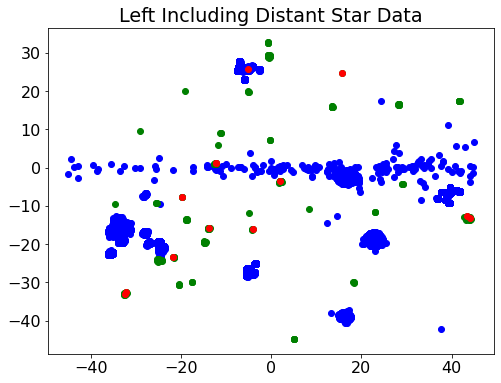

In [15]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantL = pd.read_csv(ddir+'Left/Distant_Galaxy_Data.csv') 



plt.scatter(CL[:,0], CL[:,1], color ='b')
plt.scatter(distantL.X, distantL.Y, color = 'g')
plt.scatter(CLf[:,0], CLf[:,1], color='r')
plt.title('Left Including Distant Star Data')

In [16]:
CLf
#(-5.1 ,  25.91) -> (-4.99248585, -26.7126611)


array([[-21.79, -23.39],
       [  1.94,  -3.52],
       [-12.31,   1.17],
       [ 15.78,  24.81],
       [-12.32,   1.19],
       [-32.41, -33.02],
       [ -4.11, -16.14],
       [ 43.4 , -12.7 ],
       [ 44.1 , -13.25],
       [ -5.1 ,  25.91],
       [-13.81, -15.89],
       [-32.09, -32.57],
       [-19.78,  -7.66]])

Text(0.5, 1.0, 'Flash+Galaxies -Top')

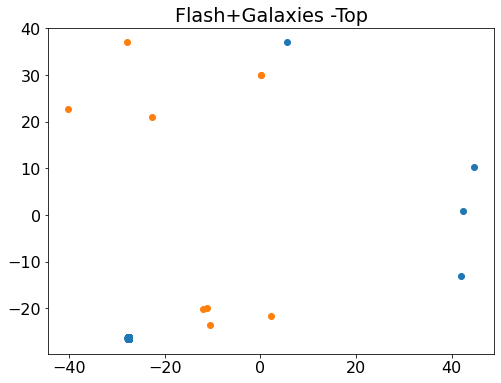

In [17]:
#Top
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
plt.title("Top")
flashT=flash[flash['Direction']=='Top']
XT=flashT.X
YT=flashT.Y
CTf=np.array(list(zip(flashT.X,flashT.Y)))
plt.scatter(CTf[:,0], CTf[:,1])
plt.title('Flash+Galaxies -Top')

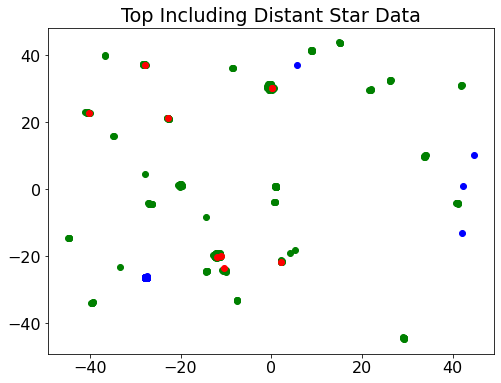

In [18]:
#Top

ddir = '/Users/eleanor/Downloads/universe_2/'
distantT = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 



plt.scatter(CT[:,0], CT[:,1], color ='b')
plt.scatter(distantT.X, distantT.Y, color = 'g')
plt.title('Top Including Distant Star Data')
plt.scatter(CTf[:,0], CTf[:,1], color = 'r')


In [19]:
##none

Text(0.5, 1.0, 'Flash+Galaxies-Bottom')

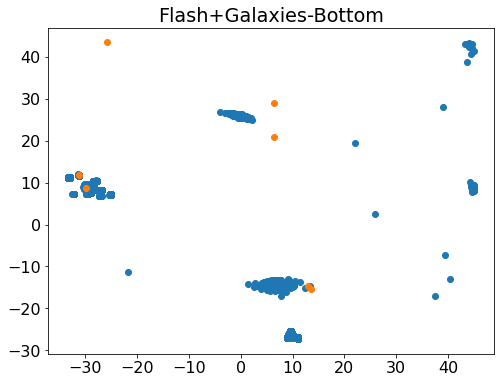

In [20]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

flashB=flash[flash['Direction']=='Bottom']
CBf=np.array(list(zip(flashB.X,flashB.Y)))
plt.scatter(CBf[:,0], CBf[:,1])
plt.title('Flash+Galaxies-Bottom')

Text(0.5, 1.0, 'Bottom Including Distant Star Data')

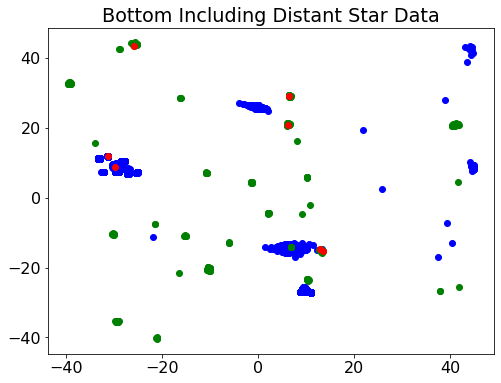

In [21]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantB = pd.read_csv(ddir+'Bottom/Distant_Galaxy_Data.csv') 



plt.scatter(CB[:,0], CB[:,1], color ='b')
plt.scatter(distantB.X, distantB.Y, color = 'g')
plt.scatter(CBf[:,0], CBf[:,1], color='r')
plt.title('Bottom Including Distant Star Data')

In [22]:
CBf
# (-31.31,  11.77)  -> (-31.28251018,  11.73160519)
# (-29.79,   8.73)  -> (-29.60634515,   8.98371267)
# (13.02, -14.75)   -> (9.04636477, -14.32011399) -> closest because clustering doesnt like that galaxy

array([[-29.79,   8.73],
       [ 13.02, -14.75],
       [-31.31,  11.77],
       [  6.44,  29.02],
       [-25.83,  43.41],
       [ 13.6 , -15.31],
       [  6.36,  20.85]])

In [23]:
ddir = '/Users/eleanor/Downloads/universe_2/'
flash = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 

Text(0.5, 1.0, 'Flash+Galaxies -Top')

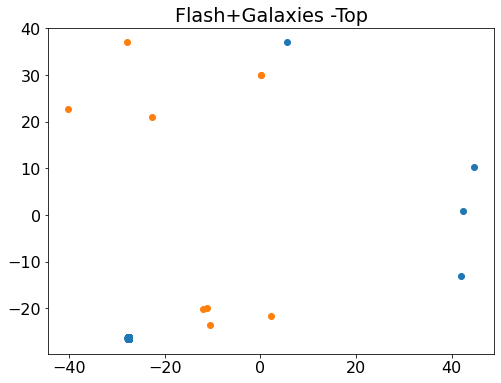

In [26]:
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
plt.title("Top")
#flashT=flash[flash['Direction']=='Top']
XT=flashT.X
YT=flashT.Y
CTf=np.array(list(zip(flashT.X,flashT.Y)))
plt.scatter(CTf[:,0], CTf[:,1])
plt.title('Flash+Galaxies -Top')

In [27]:
flashT

,Name,Direction,X,Y,Photon-Count
0,FE01,Top,-10.47,-23.63,27645
18,FE19,Top,-11.98,-20.17,363
30,FE31,Top,-27.84,36.99,372
37,FE38,Top,2.22,-21.68,506
40,FE41,Top,-40.20,22.73,2320
45,FE46,Top,-22.67,21.08,460
47,FE48,Top,-11.09,-19.88,354
49,FE50,Top,0.21,30.11,1295
54,FE55,Top,0.22,30.12,1304
